In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import session_info
session_info.show()

# PART I: DATA PREPROCESSING:

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
training_set = train_datagen.flow_from_directory(
        "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/train",
        target_size=(200, 200),
        batch_size=128,
        class_mode='categorical')

Found 2908 images belonging to 5 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test",
        target_size=(200, 200),
        batch_size=128,
        class_mode='categorical')

Found 99 images belonging to 5 classes.


In [6]:
training_set[2]

(array([[[[0.01563044, 0.02739514, 0.09925334],
          [0.0146996 , 0.02646431, 0.10097411],
          [0.01407718, 0.03046684, 0.10728913],
          ...,
          [0.4884728 , 0.7281634 , 0.827926  ],
          [0.48738638, 0.7249041 , 0.8257531 ],
          [0.48629993, 0.7216448 , 0.82358027]],
 
         [[0.01275069, 0.02451539, 0.09445377],
          [0.01661943, 0.02838414, 0.10289395],
          [0.01280103, 0.02857117, 0.10207838],
          ...,
          [0.48516765, 0.7204618 , 0.82242256],
          [0.4840812 , 0.7193754 , 0.82133615],
          [0.4829948 , 0.7182889 , 0.82024974]],
 
         [[0.01128093, 0.02304563, 0.09032241],
          [0.01530109, 0.02838934, 0.09598161],
          [0.01035072, 0.03169487, 0.09674629],
          ...,
          [0.48235297, 0.7176471 , 0.8196079 ],
          [0.48235297, 0.7176471 , 0.8196079 ],
          [0.48235297, 0.7176471 , 0.8196079 ]],
 
         ...,
 
         [[0.03570014, 0.07099426, 0.23177858],
          [0.03461

# PART II: BUILDING CONVOLUTIONAL NEURAL NETWORKS:

<font color=red>
Step 1: Choosing Model Type

In [7]:
cnn = Sequential() #Choosing sequential model.

<font color=red>
Step 2: Adding The First Convolution Layer

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=[200,200,3])) #Adding convolution layer

<font color=red>
Step 3: Adding Pooling Layer:

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. It is used to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features

In [9]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

<font color=red>
Step 4: Adding The Second Convolution Layer

In [10]:
cnn.add(Conv2D(filters= 64, kernel_size=3, activation= "relu"))

<font color=red>
Step 5: Adding the Second Pooling Layer

In [11]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(Conv2D(filters= 128, kernel_size=3, activation= "relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))

<font color=red>
Step 6: Adding Flatten Layer:

In [13]:
cnn.add(Flatten())

<font color=red>
Step 7: Adding Artificial Neural Networks Layer for Full Connection

In [14]:
cnn.add(Dense(units=512,activation="relu"))

In [15]:
#cnn.add(Dense(units=256,activation="relu"))

In [16]:
cnn.add(Dense(units=5,activation="softmax"))

<font color=red>
Step 8: Compiling the CNN

In [17]:
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
cnn.summary() #This is the summary of our model 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy',min_delta= 0.01 ,  patience= 10, verbose= 2, mode='auto')
mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',save_best_only = True )

<font color=red>
Step 8: Training the CNN

In [42]:
history= cnn.fit(x=training_set,validation_data=test_set,callbacks = [mc,es],epochs=25)

Epoch 1/25
23/23 [==============================] - 389s 17s/step - loss: 0.2735 - accuracy: 0.9027 - val_loss: 0.3359 - val_accuracy: 0.8990
Epoch 2/25
23/23 [==============================] - 362s 16s/step - loss: 0.2437 - accuracy: 0.9171 - val_loss: 0.6073 - val_accuracy: 0.8687
Epoch 3/25
23/23 [==============================] - 377s 16s/step - loss: 0.2363 - accuracy: 0.9133 - val_loss: 0.4462 - val_accuracy: 0.8586
Epoch 4/25
23/23 [==============================] - 365s 16s/step - loss: 0.2707 - accuracy: 0.8958 - val_loss: 0.3414 - val_accuracy: 0.8788
Epoch 5/25
23/23 [==============================] - 355s 15s/step - loss: 0.2398 - accuracy: 0.9123 - val_loss: 0.8158 - val_accuracy: 0.8182
Epoch 6/25
23/23 [==============================] - 383s 17s/step - loss: 0.1893 - accuracy: 0.9312 - val_loss: 0.6590 - val_accuracy: 0.8384
Epoch 7/25
23/23 [==============================] - 357s 16s/step - loss: 0.1881 - accuracy: 0.9288 - val_loss: 0.2650 - val_accuracy: 0.9293
Epoch 

# PART III: EVALUATION OF THE MODEL and MAKING PREDICTIIONS

In [43]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.273538,0.902682,0.335865,0.898990
1,0.243676,0.917125,0.607315,0.868687
2,0.236309,0.913342,0.446200,0.858586
3,0.270672,0.895805,0.341394,0.878788
4,0.239780,0.912311,0.815813,0.818182
5,0.189300,0.931224,0.658980,0.838384
6,0.188129,0.928817,0.264981,0.929293
7,0.173876,0.939477,0.518425,0.888889
8,0.166953,0.939133,0.508759,0.868687
9,0.195752,0.928473,0.195407,0.929293


<AxesSubplot:>

<Figure size 864x720 with 0 Axes>

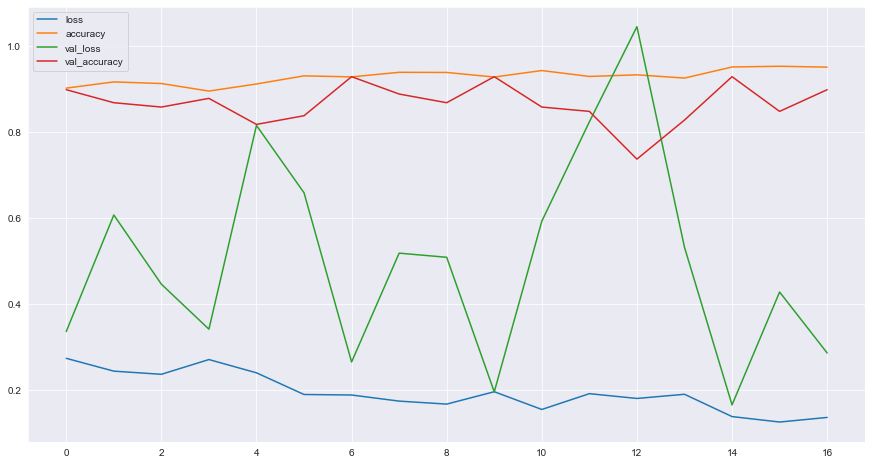

In [44]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
pd.DataFrame(cnn.history.history).plot(figsize=(15,8))

In [45]:
from tensorflow.keras.preprocessing import image

In [46]:
print(training_set.class_indices)
print(training_set.class_indices)

{'clean': 0, 'crack': 1, 'dirty': 2, 'fog': 3, 'rain': 4}
{'clean': 0, 'crack': 1, 'dirty': 2, 'fog': 3, 'rain': 4}


In [47]:
def predictor(location):
    test_image=image.load_img(location,target_size=(200,200))
    test_image=image.img_to_array(test_image)
    test_image = test_image/255
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    if np.argmax(result) == 0:
        prediction = "There is no obstruction, it is clean view of camera"
    elif np.argmax(result) == 1:
        prediction = "There is a glass crack in view of camera"
    elif np.argmax(result) == 2:
        prediction = "There is a dirty view in the camera"
    elif np.argmax(result) == 3:
        prediction = "There is a foggy view in the camera"
    elif np.argmax(result) == 4:
        prediction = "There is a rainy view in the camera"
    print(np.argmax(result))
    return prediction

<font color=red>
Testing of Model Performance with Non-crack Images from Test Data:

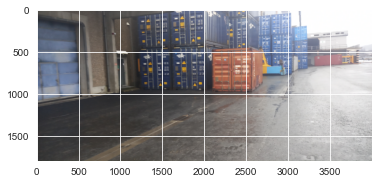

In [48]:
plt.imshow(plt.imread("C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/clean/40.jpg"))

In [49]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/clean/40.jpg"
predictor(location)

0


'There is no obstruction, it is clean view of camera'

In [50]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/rain/3.jpg"
predictor(location)

4


'There is a rainy view in the camera'

In [51]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/crack/14.jpg"
predictor(location)

1


'There is a glass crack in view of camera'

In [52]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/crack/14.jpg"
predictor(location)

1


'There is a glass crack in view of camera'

In [53]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/dirty/1.jpg"
predictor(location)

1


'There is a glass crack in view of camera'

In [54]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/fog/9.jpg"
predictor(location)

3


'There is a foggy view in the camera'

In [55]:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/dirty/9.jpg"
predictor(location)

2


'There is a dirty view in the camera'

<font color=red>
Testing of Model Performance with crack Images from Test Data:

# PART IV: SAVING THE MODEL 

In [56]:
# save model and architecture to single file
cnn.save("best_model2.h5")
print("Saved model to disk")

Saved model to disk


# Reload Saved Model and Make a Prediction:

In [57]:
from tensorflow.keras.models import load_model
model = load_model('best_model2.h5')
# summarize model.
model.summary()
# load dataset

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [58]:
def predictor2(location):
    test_image=image.load_img(location,target_size=(200,200))
    test_image=image.img_to_array(test_image)
    test_image = test_image/255
    test_image=np.expand_dims(test_image, axis=0)
    result=model.predict(test_image)
    training_set.class_indices
    if np.argmax(result) == 0:
        prediction = "There is no obstruction, it is clean view of camera"
    elif np.argmax(result) == 1:
        prediction = "There is a glass crack in view of camera"
    elif np.argmax(result) == 2:
        prediction = "There is a dirty view in the camera"
    elif np.argmax(result) == 3:
        prediction = "There is a foggy view in the camera"
    elif np.argmax(result) == 4:
        prediction = "There is a rainy view in the camera"
    print(np.argmax(result))
    return prediction

1


Text(1, 1, 'There is a glass crack in view of camera')

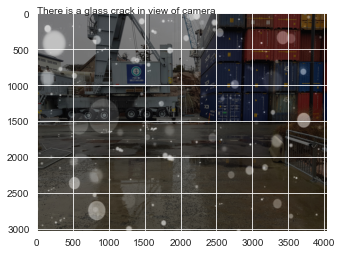

In [59]:
#Lets test of the reloaded model with non-crack images:
location= "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/dirty/1.jpg"
plt.imshow(plt.imread(location))
plt.text(1, 1,predictor2(location))

0
4
3
2
1
0
4
3
2
1


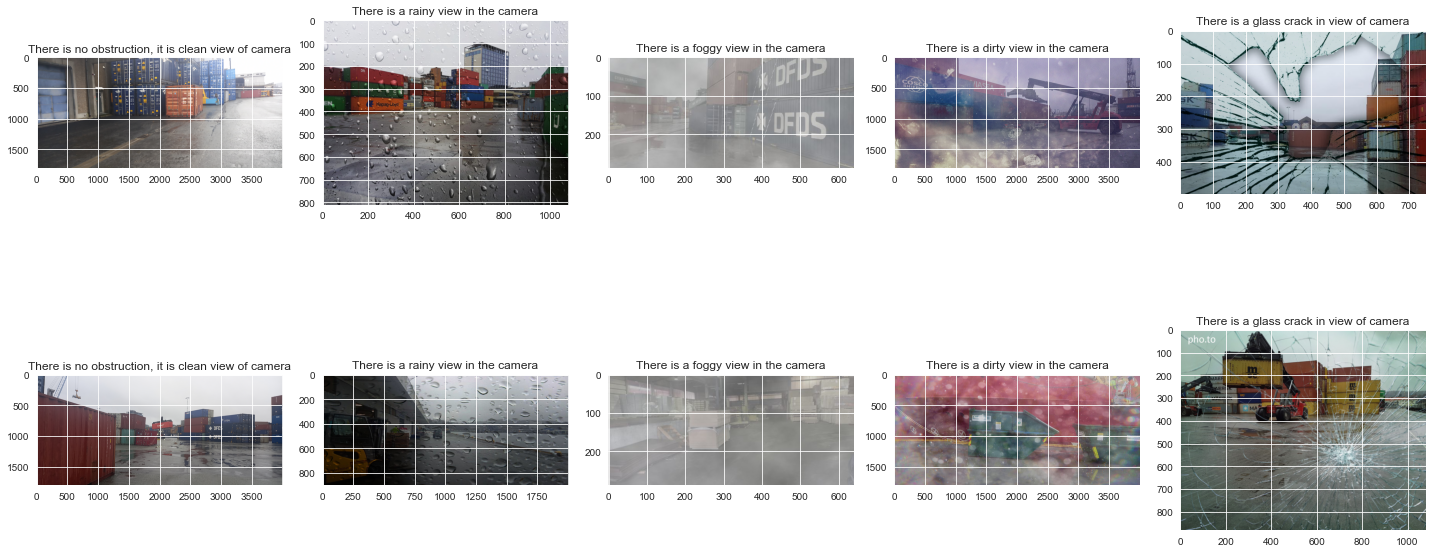

In [60]:
import PIL
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
lst = ["C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/clean/40.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/rain/3.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/fog/9.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/dirty/9.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/crack/9.jpg",
       "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/clean/19.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/rain/4.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/fog/10.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/dirty/47.jpg",
      "C:/Users/Bruker/OneDrive/Desktop/Agder University/2. Year/2.Semester/DAT304-G 22V Bacheloroppgave/kristinasandmarine/test/crack/10.jpg"]

axs[0][0].title.set_text(predictor2(lst[0]))
axs[0][0].imshow(PIL.Image.open(lst[0]))
axs[0][1].title.set_text(predictor2(lst[1]))
axs[0][1].imshow(PIL.Image.open(lst[1])) 
axs[0][2].title.set_text(predictor2(lst[2]))
axs[0][2].imshow(PIL.Image.open(lst[2]))  
axs[0][3].title.set_text(predictor2(lst[3]))
axs[0][3].imshow(PIL.Image.open(lst[3]))  
axs[0][4].title.set_text(predictor2(lst[4]))
axs[0][4].imshow(PIL.Image.open(lst[4]))    
axs[1][0].title.set_text(predictor2(lst[5]))
axs[1][0].imshow(PIL.Image.open(lst[5]))   
axs[1][1].title.set_text(predictor2(lst[6]))
axs[1][1].imshow(PIL.Image.open(lst[6]))  
axs[1][2].title.set_text(predictor2(lst[7]))
axs[1][2].imshow(PIL.Image.open(lst[7])) 
axs[1][3].title.set_text(predictor2(lst[8]))
axs[1][3].imshow(PIL.Image.open(lst[8]))  
axs[1][4].title.set_text(predictor2(lst[9]))
axs[1][4].imshow(PIL.Image.open(lst[9]))

fig.tight_layout()